In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

print(df.head())
print("\n\nSize:" ,df.size)
print("Shape:" ,df.shape)
print("Columns:" ,df.columns)
print("\nUnique Labels:" ,df['label'].unique())
print("\nType:" ,df.dtypes)
print("\nValue Count:" ,df['label'].value_counts())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


Size: 17600
Shape: (2200, 8)
Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Unique Labels: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Type: N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Value Count: label
ri

In [ ]:
#Seperating features and target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)


In [ ]:
# Number of features
num_features = Xtrain.shape[1]

# Number of data points in train and test sets
train_size = Xtrain.shape[0]
test_size = Xtest.shape[0]

# Number of labels in ytrain and ytest
num_train_labels = Ytrain.shape[0]
num_test_labels = Ytest.shape[0]

print(f"Number of Features: {num_features}")
print(f"Training Data Size (X): {train_size}")
print(f"Testing Data Size (X): {test_size}")
print(f"Training Labels Size (Y): {num_train_labels}")
print(f"Testing Labels Size (Y): {num_test_labels}")


Number of Features: 7
Training Data Size (X): 1760
Testing Data Size (X): 440
Training Labels Size (Y): 1760
Testing Labels Size (Y): 440


In [ ]:
model_files = {
    "Naive Bayes Classifier": "NBClassifier.pkl",
    "Decision Tree": "DecisionTree.pkl",
    "Random Forest": "RandomForest.pkl",
    "Support Vector Classifier": "SVMClassifier.pkl",
    "Logistic Regression": "LogisticRegression.pkl"
}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Training
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)

#Predict
predicted_values = NaiveBayes.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Naive Bayes')

# Print results
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


#Cross Validation--> used because we are still deciding in the model
score = cross_val_score(NaiveBayes, features, target,cv=5)
print(f"Cross Validation Accuracy: {score.mean():.4f}")

#Saving the model
import pickle
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()



Naive Bayes Accuracy: 99.09%
Precision: 0.9920
Recall: 0.9909
F1-Score: 0.9906
Cross Validation Accuracy: 0.9950


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Training SVM model
SVM = SVC(kernel='linear', random_state=2)
SVM.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = SVM.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('SVM')

# Print results
print(f"SVM Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation (used because we are still deciding on the model)
score = cross_val_score(SVM, features, target, cv=5)  # Use SVM, Xtrain, and Ytrain
print(f"Cross Validation Accuracy: {score.mean():.4f}")

# Saving the SVM model
SVM_pkl_filename = 'SVMClassifier.pkl'
with open(SVM_pkl_filename, 'wb') as SVM_Model_pkl:
    pickle.dump(SVM, SVM_Model_pkl)


SVM Accuracy: 97.73%
Precision: 0.9775
Recall: 0.9773
F1-Score: 0.9773
Cross Validation Accuracy: 0.9850


In [ ]:
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Training Logistic Regression model
LogisticReg = LogisticRegression(random_state=2, max_iter=200)  # You can adjust hyperparameters
LogisticReg.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = LogisticReg.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Logistic Regression')

# Print results
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation (used because we are still deciding on the model)
score = cross_val_score(LogisticReg, features, target, cv=5)  # Use LogisticReg, Xtrain, and Ytrain
print(f"Cross Validation Accuracy: {score.mean():.4f}")

import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogisticReg, LR_Model_pkl)
LR_Model_pkl.close()


Logistic Regression Accuracy: 96.14%
Precision: 0.9632
Recall: 0.9614
F1-Score: 0.9605
Cross Validation Accuracy: 0.9655


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle


# Training Random Forest model
RF = RandomForestClassifier(random_state=2, n_estimators=100)  # You can adjust n_estimators and other hyperparameters
RF.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = RF.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Random Forest')

# Print results
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation (used because we are still deciding on the model)
score = cross_val_score(RF, features, target, cv=5)
print(f"Cross Validation Accuracy: {score.mean():.4f}")

# Saving the Random Forest model
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()


Random Forest Accuracy: 99.55%
Precision: 0.9958
Recall: 0.9955
F1-Score: 0.9954
Cross Validation Accuracy: 0.9927


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Decision Tree
DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DecisionTree.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = DecisionTree.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Decision Tree')

# Print results
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Cross Validation--> used because we are still deciding in the model
score = cross_val_score(DecisionTree, features, target,cv=5)
print(f"Cross Validation Accuracy: {score.mean():.4f}")

#Saving the model
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()


Decision Tree Accuracy: 90.00%
Precision: 0.8572
Recall: 0.9000
F1-Score: 0.8707
Cross Validation Accuracy: 0.9141


In [ ]:
import time

acc = []
model_names = []
prediction_times = []

for name, file in model_files.items():
    with open(file, "rb") as f:
        model = pickle.load(f)

    # Measure prediction time
    start_time = time.time()
    Ytest_pred = model.predict(Xtest)
    end_time = time.time()

    test_acc = accuracy_score(Ytest, Ytest_pred)
    time_taken = end_time - start_time

    acc.append(test_acc)
    model_names.append(name)
    prediction_times.append(time_taken)

# Optional: print prediction times
for name, t in zip(model_names, prediction_times):
    print(f"{name} Prediction Time: {t:.6f} seconds")


Naive Bayes Classifier Prediction Time: 0.002248 seconds
Decision Tree Prediction Time: 0.001418 seconds
Random Forest Prediction Time: 0.014620 seconds
Support Vector Classifier Prediction Time: 0.009880 seconds
Logistic Regression Prediction Time: 0.001376 seconds


In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
import time  # For measuring prediction time

# Encode string labels to numeric values
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Training XGBoost model
XB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2, n_estimators=100)
XB.fit(Xtrain, Ytrain_encoded)

# Measure prediction time
start_time = time.time()
predicted_values = XB.predict(Xtest)
end_time = time.time()
prediction_time = end_time - start_time

# Convert predictions back to original labels (optional)
predicted_labels = label_encoder.inverse_transform(predicted_values)

# Compute metrics
accuracy = accuracy_score(Ytest_encoded, predicted_values)
precision = precision_score(Ytest_encoded, predicted_values, average='weighted')
recall = recall_score(Ytest_encoded, predicted_values, average='weighted')
f1 = f1_score(Ytest_encoded, predicted_values, average='weighted')

# Store accuracy and time in lists
acc.append(accuracy)
model_names.append('XGBoost')
prediction_times.append(prediction_time)  # Add this line if prediction_times list is defined

# Print results
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Prediction Time: {prediction_time:.6f} seconds")

# Cross-validation
score = cross_val_score(XB, Xtrain, Ytrain_encoded, cv=5)
print(f"Cross Validation Accuracy: {score.mean():.4f}")

# Saving the model
XB_pkl_filename = 'XGBoost.pkl'
with open(XB_pkl_filename, 'wb') as XB_Model_pkl:
    pickle.dump(XB, XB_Model_pkl)


XGBoost Accuracy: 99.09%
Precision: 0.9913
Recall: 0.9909
F1-Score: 0.9908
Prediction Time: 0.008924 seconds
Cross Validation Accuracy: 0.9858


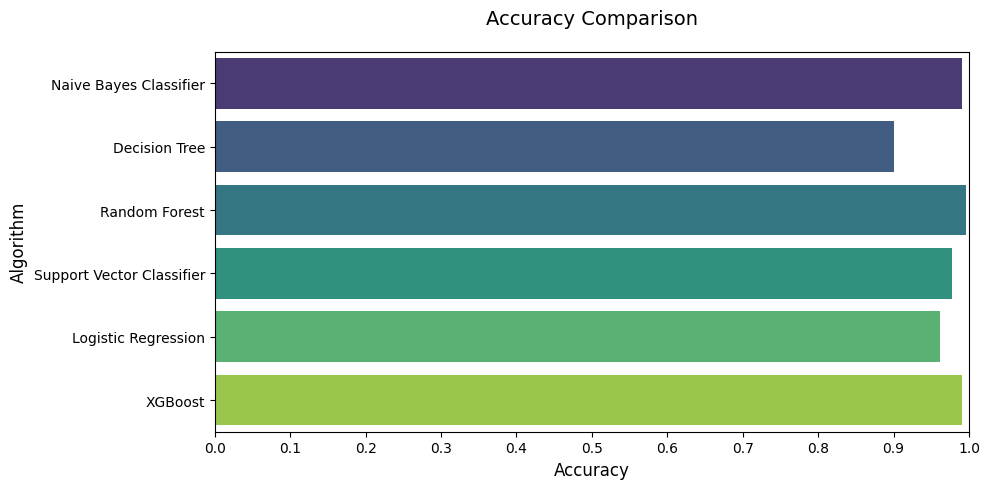

In [ ]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison', fontsize=14, pad=20)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Algorithm', fontsize=12)

# Set bar width to 0.4 (default is 0.8)
sns.barplot(x=acc, y=model_names, palette='viridis')

plt.xticks(
    ticks=[i * 0.1 for i in range(0, 11)],
    labels=[f"{i * 0.1:.1f}" for i in range(0, 11)]
)
plt.xlim(0, 1.0)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_leaf_nodes': [None, 10],
    'max_samples': [None, 0.8],  # None means use all samples
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain, Ytrain)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Ytest_pred = best_model.predict(Xtest)

accuracy = accuracy_score(Ytest, Ytest_pred)
precision = precision_score(Ytest, Ytest_pred, average='weighted')
recall = recall_score(Ytest, Ytest_pred, average='weighted')
f1 = f1_score(Ytest, Ytest_pred, average='weighted')

# Save the tuned model to a file
with open('TunedRandomForest.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"Tuned Random Forest Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Tuned Random Forest Accuracy: 0.9909
Precision: 0.9920
Recall: 0.9909
F1 Score: 0.9906


In [ ]:
N = 60
P = 60
k = 60
temperature = 25
humidity = 40
ph = 5.0
rainfall = 150

data = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
print(data)
prediction = RF.predict(data)
print(prediction)

[[ 60.  60.  60.  25.  40.   5. 150.]]
['coffee']


In [ ]:
import numpy as np
import pickle

# Input values
input_values = np.array([[60, 60, 60, 25, 40, 5.0, 150]])  # Shape (1, 7)

# Load the tuned model
with open('TunedRandomForest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make prediction
prediction = loaded_model.predict(input_values)

# Print prediction result
print("Predicted Crop:", prediction[0])


Predicted Crop: coffee


In [ ]:
import joblib

N = 60
P = 60
k = 60
temperature = 25
humidity = 40
ph = 5
rainfall = 150

model_path = "RandomForest.pkl"
model = joblib.load(model_path)
print("Model loaded successfully")

data = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
print(data)

prediction = model.predict(data)  # Correcting prediction statement
print("Prediction:", prediction)

prediction2 = RF.predict(data)
print(prediction2)



Model loaded successfully
[[ 60  60  60  25  40   5 150]]
Prediction: ['coffee']
['coffee']


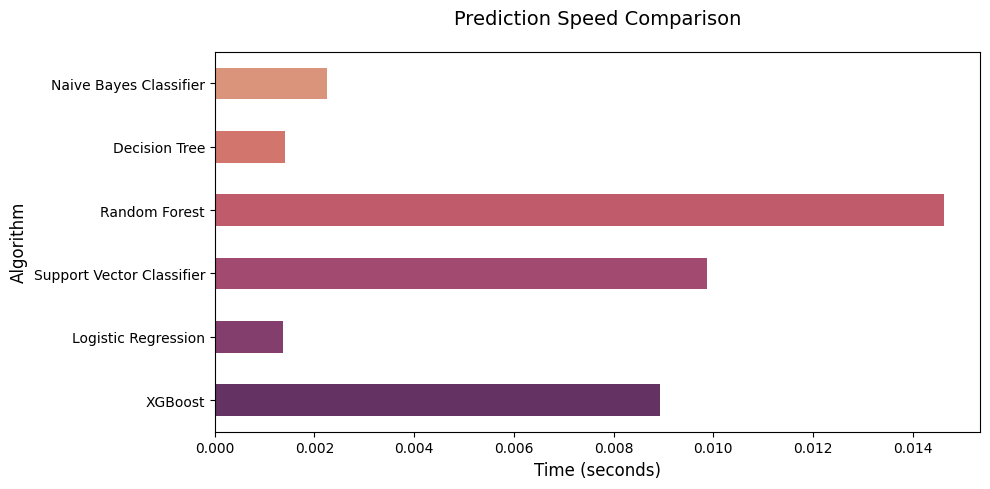

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting prediction time comparison
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Prediction Speed Comparison', fontsize=14, pad=20)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Algorithm', fontsize=12)

# Set bar width to 0.5 for clarity
sns.barplot(x=prediction_times, y=model_names, palette='flare', width=0.5)

plt.tight_layout()
plt.show()


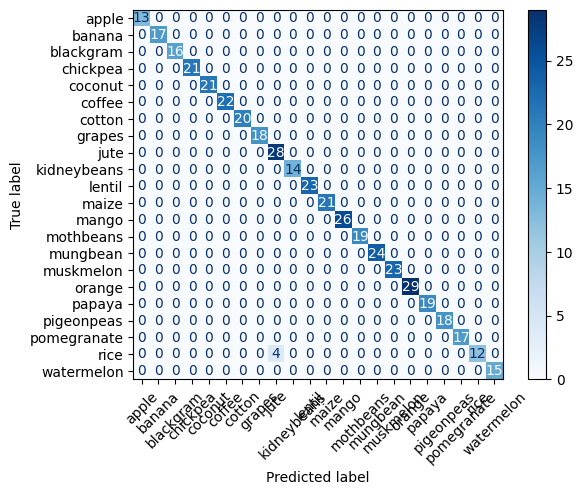

Accuracy: 0.990909090909091


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle  # Ensure this is imported

# Load the tuned model
with open('TunedRandomForest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict on the test set
Ytest_pred = loaded_model.predict(Xtest)  # This is the correct way

# Generate confusion matrix
cm = confusion_matrix(Ytest, Ytest_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loaded_model.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)

plt.show()

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Ytest, Ytest_pred))

